In [54]:
import pandas as pd
import numpy as np

In [56]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [58]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [60]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [64]:
df.fillna({'Age':df['Age'].mean()},inplace=True)

In [66]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
X_train.head(2)

,Age,Fare
331,45.5,28.5
733,23.0,13.0


# Apply binning  

In [79]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [81]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [83]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

C:\Users\HD\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [85]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 16.        , 21.        , 24.        , 28.        ,
              29.69911765, 32.        , 38.        , 47.        , 80.        ])],
      dtype=object)

In [87]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [89]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [91]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
540,36.000000,6.0,71.0000,8.0,"(32.0, 38.0]","(39.688, 77.288]"
749,31.000000,5.0,7.7500,1.0,"(29.699, 32.0]","(7.55, 7.889]"
255,29.000000,4.0,15.2458,5.0,"(28.0, 29.699]","(14.454, 21.045]"
384,29.699118,5.0,7.8958,2.0,"(28.0, 29.699]","(7.889, 8.05]"
645,48.000000,8.0,76.7292,8.0,"(47.0, 80.0]","(39.688, 77.288]"


In [93]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6599750312109862


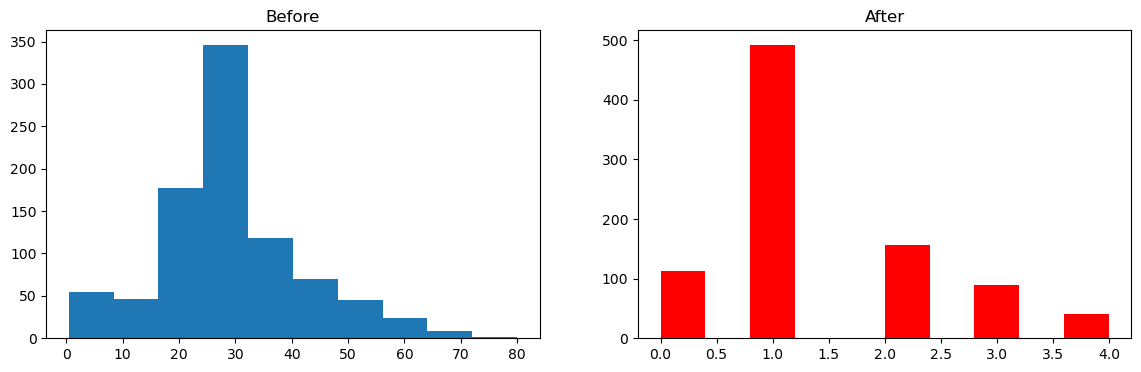

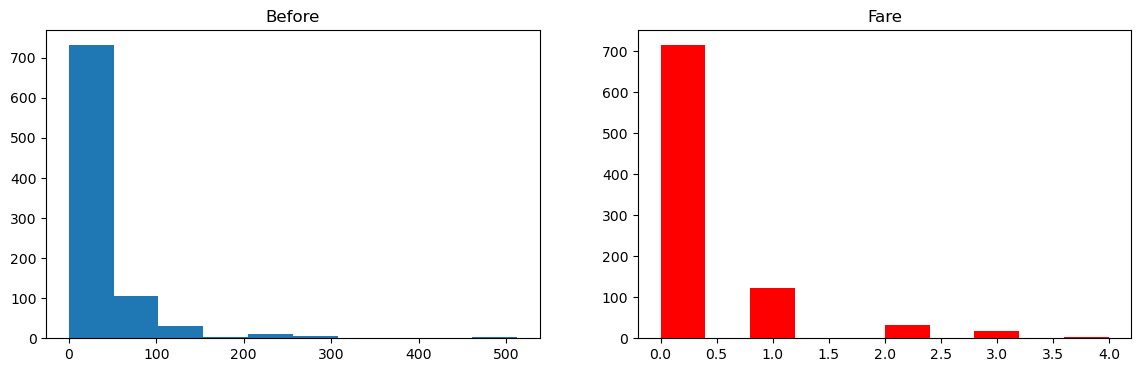

In [95]:
discretize(5,'kmeans')